In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn import ensemble, tree, metrics, preprocessing, svm
plt.style.use('seaborn-white')
sns.set(style = 'white', font_scale = 1.53)

def save(name):
    plt.savefig('C:\\Users\\KNITISH\\Documents\\Articles\\Anomaly Detection\\Part 2\\'+name+'.png', dpi = 150, bbox_inches = 'tight')

In [5]:
d1 = np.random.multivariate_normal(mean = np.array([-.5, 0]),
                               cov = np.array([[1, 0], [0, 1]]), size = 100)


d2 = np.random.multivariate_normal(mean = np.array([15, 10]),
                               cov = np.array([[1, 0.3], [.3, 1]]), size = 100)

outliers = np.array([[0, 10],[0, 9.5]])
d = pd.DataFrame(np.concatenate([d1, d2, outliers], axis = 0), columns = ['Var 1', 'Var 2'])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Var 1', ylabel='Var 2'>

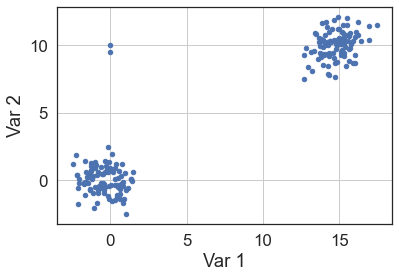

In [6]:
d.plot.scatter('Var 1', 'Var 2', grid = True)
#save('data')


## Build an Isolation Forest

In [22]:
model  =  ensemble.IsolationForest(n_estimators=50, max_samples=500, contamination=.0075, max_features=2, 
                         bootstrap=False, n_jobs=1, random_state=1, verbose=0, warm_start=False).fit(d)

anomaly_score = model.decision_function(d)
scores = model.score_samples(d)
predictions = model.predict(d)

C:\Users\KNITISH\Miniconda3\lib\site-packages\sklearn\ensemble\_iforest.py:263: UserWarning: max_samples (500) is greater than the total number of samples (202). max_samples will be set to n_samples for estimation.
  warn("max_samples (%s) is greater than the "


(array([ 2.,  4.,  4.,  9., 10., 17., 24., 34., 52., 46.]),
 array([-0.0184785 ,  0.00913072,  0.03673994,  0.06434915,  0.09195837,
         0.11956759,  0.14717681,  0.17478603,  0.20239524,  0.23000446,
         0.25761368]),
 <BarContainer object of 10 artists>)

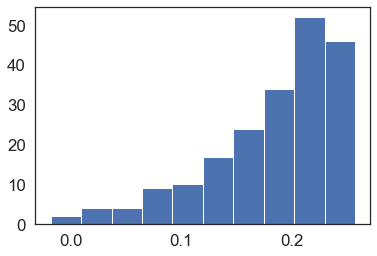

In [23]:
plt.hist(anomaly_score)

Text(0.5, 1.0, 'Decision Function Output')

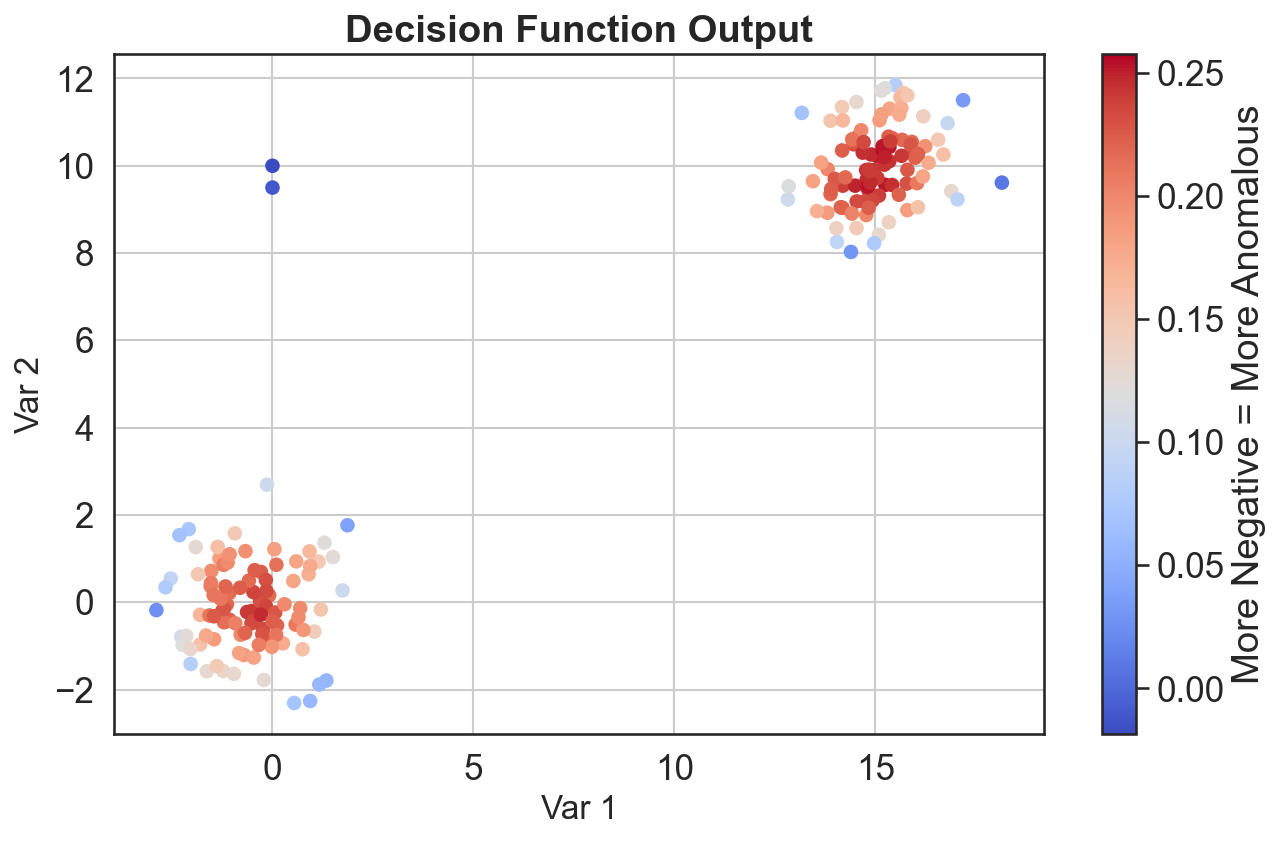

In [24]:
plt.figure(figsize = (10, 6), dpi = 150)
s = plt.scatter(d['Var 1'], d['Var 2'], c = anomaly_score, cmap = 'coolwarm')
plt.colorbar(s, label = 'More Negative = More Anomalous')
plt.xlabel('Var 1', fontsize = 16)
plt.ylabel('Var 2', fontsize = 16)
plt.grid()
plt.title('Decision Function Output', weight = 'bold')
#save('IsolationForest_1')

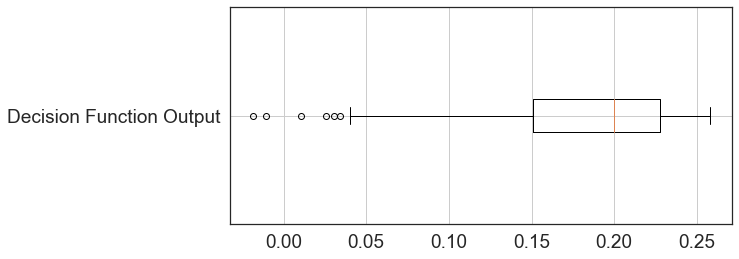

In [38]:
plt.figure(figsize = (9,4))
plt.boxplot(anomaly_score, vert = False)
plt.yticks([1], ['Decision Function Output'], fontsize = 19)
plt.xticks(fontsize = 19)
plt.grid();
save('anomalybox')

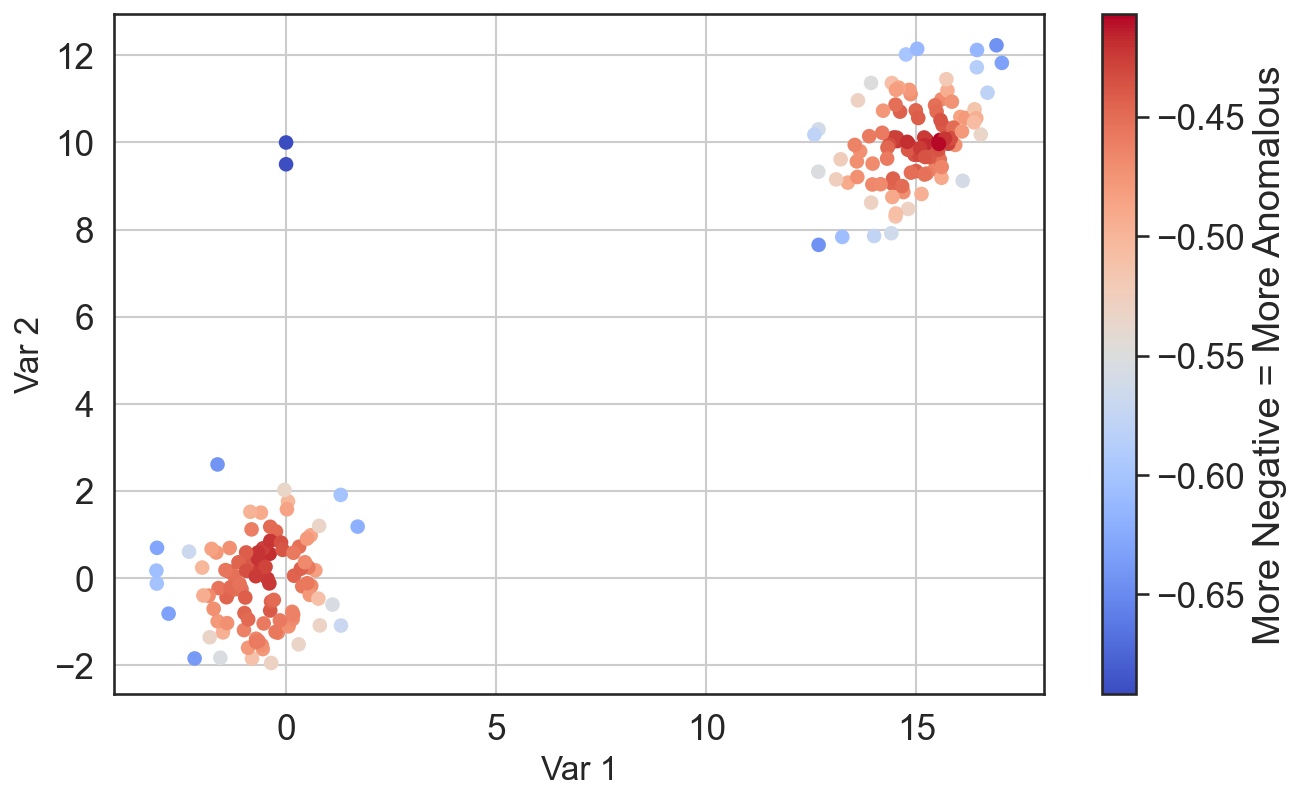

In [86]:
plt.figure(figsize = (10, 6), dpi = 150)
s = plt.scatter(d['Var 1'], d['Var 2'], c = scores, cmap = 'coolwarm')
plt.colorbar(s, label = 'More Negative = More Anomalous')
plt.xlabel('Var 1', fontsize = 16)
plt.ylabel('Var 2', fontsize = 16)
plt.grid()
save('IsolationForest_sc')

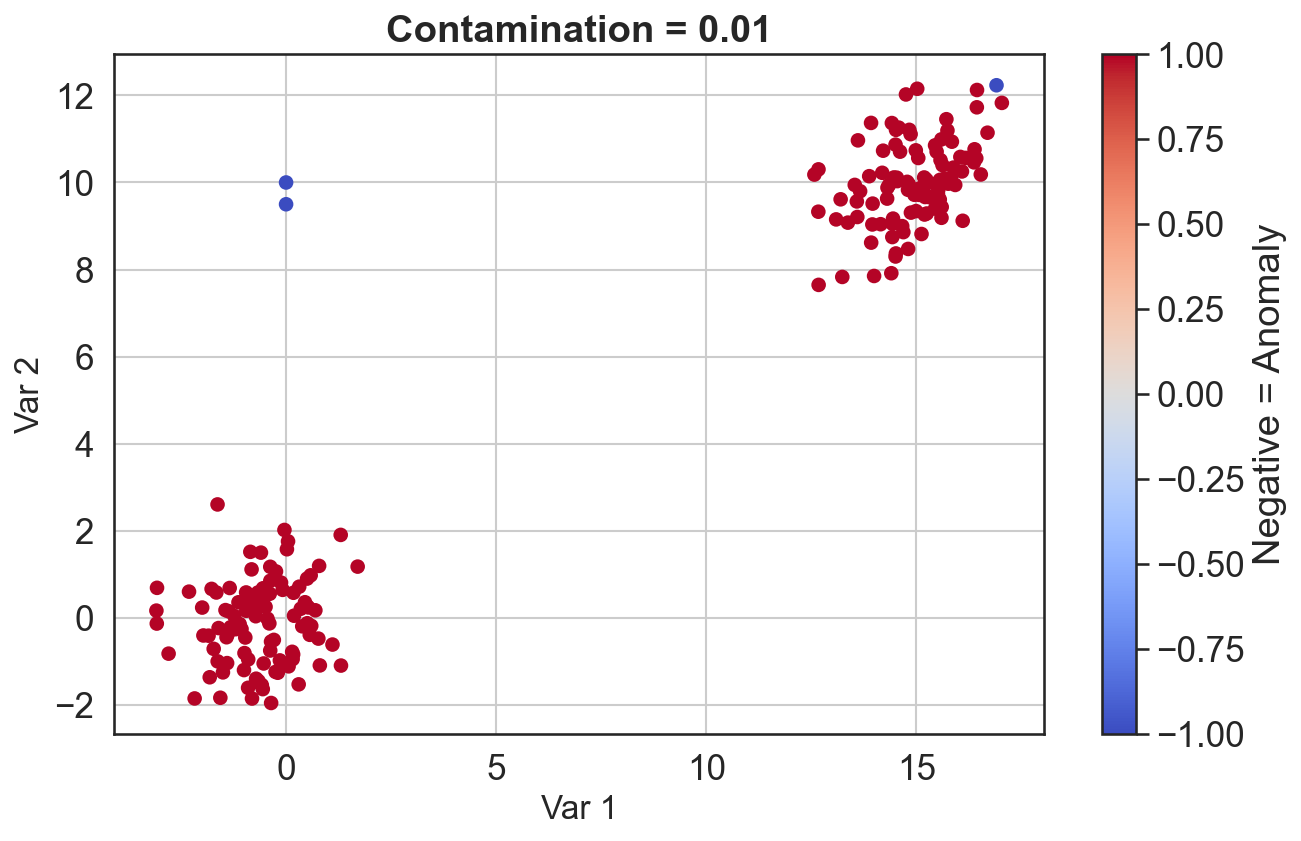

In [98]:
plt.figure(figsize = (10, 6), dpi = 150)
s = plt.scatter(d['Var 1'], d['Var 2'], c = predictions, cmap = 'coolwarm')
plt.colorbar(s, label = 'Negative = Anomaly')
plt.xlabel('Var 1', fontsize = 16)
plt.ylabel('Var 2', fontsize = 16)
plt.grid()
plt.title('Contamination = 0.01', weight = 'bold')
save('IsolationForest_predictions_01')

### As a function of COntamination


C:\Users\KNITISH\Miniconda3\lib\site-packages\sklearn\ensemble\_iforest.py:263: UserWarning: max_samples (500) is greater than the total number of samples (202). max_samples will be set to n_samples for estimation.
  warn("max_samples (%s) is greater than the "
C:\Users\KNITISH\Miniconda3\lib\site-packages\sklearn\ensemble\_iforest.py:263: UserWarning: max_samples (500) is greater than the total number of samples (202). max_samples will be set to n_samples for estimation.
  warn("max_samples (%s) is greater than the "
C:\Users\KNITISH\Miniconda3\lib\site-packages\sklearn\ensemble\_iforest.py:263: UserWarning: max_samples (500) is greater than the total number of samples (202). max_samples will be set to n_samples for estimation.
  warn("max_samples (%s) is greater than the "
C:\Users\KNITISH\Miniconda3\lib\site-packages\sklearn\ensemble\_iforest.py:263: UserWarning: max_samples (500) is greater than the total number of samples (202). max_samples will be set to n_samples for estimation.

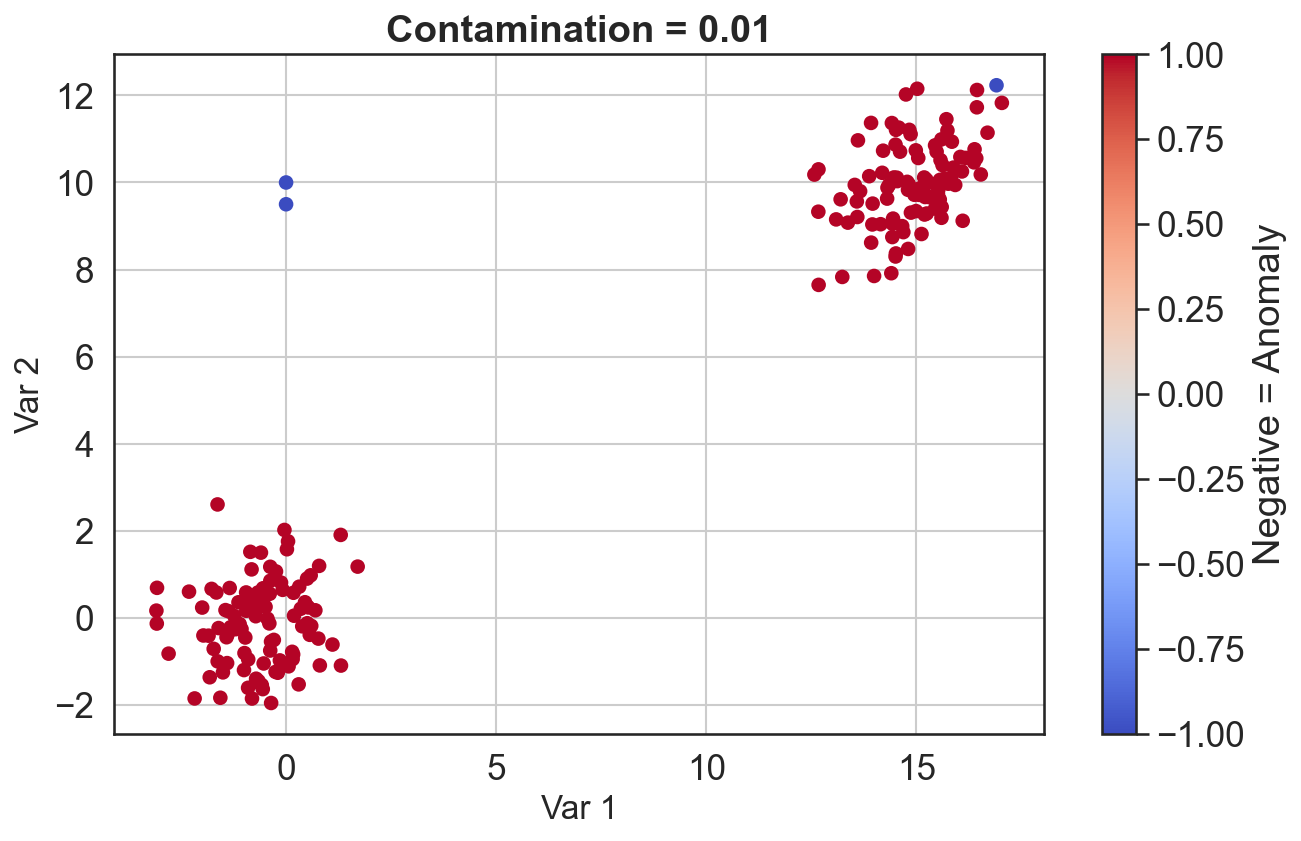

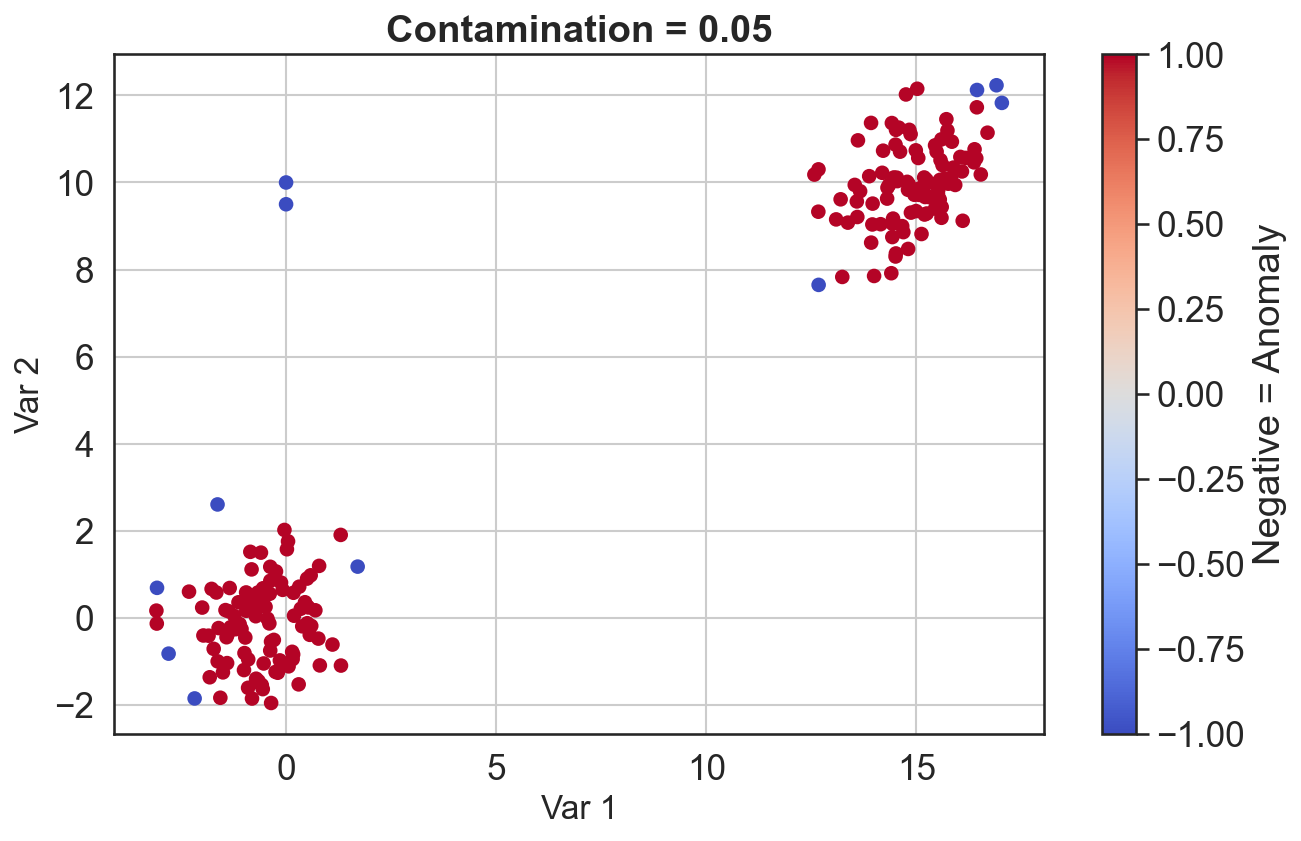

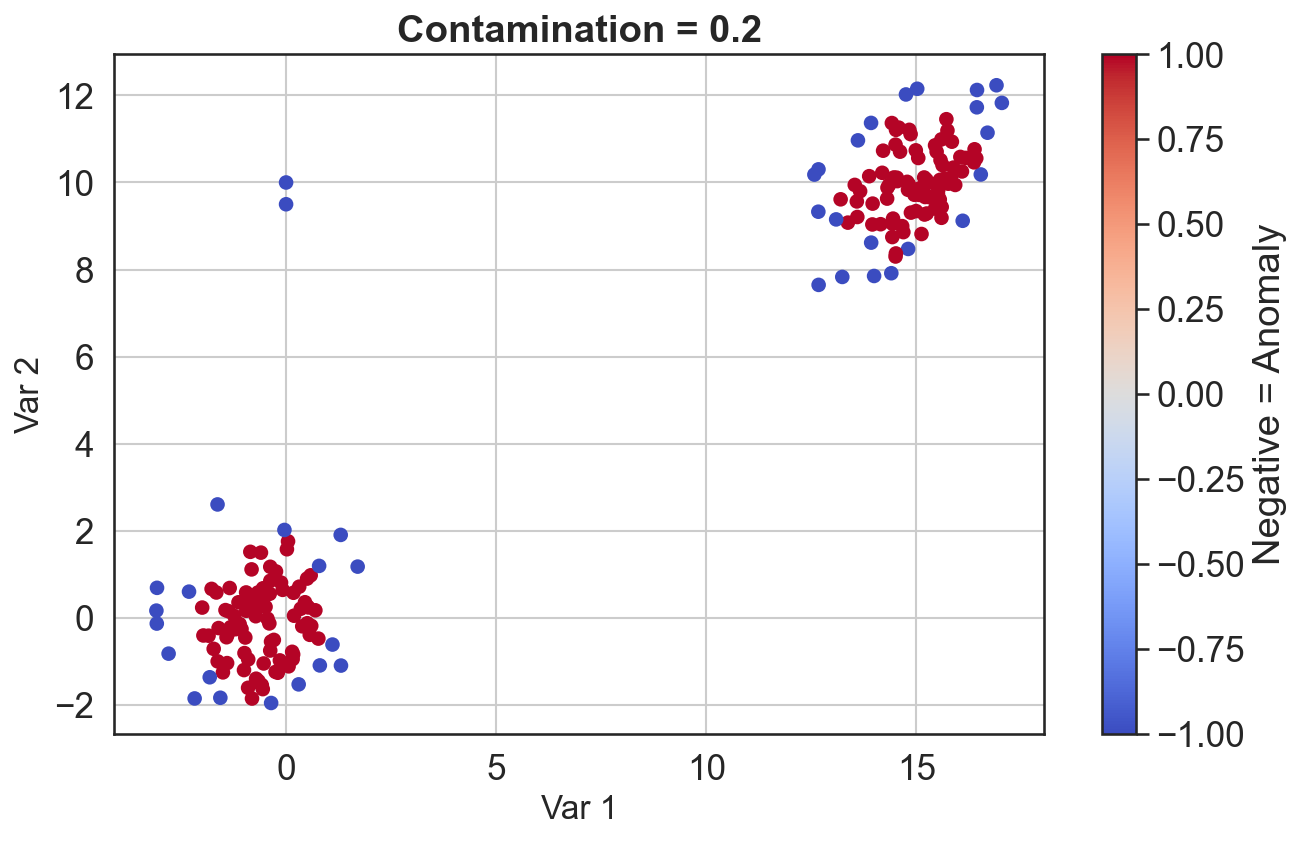

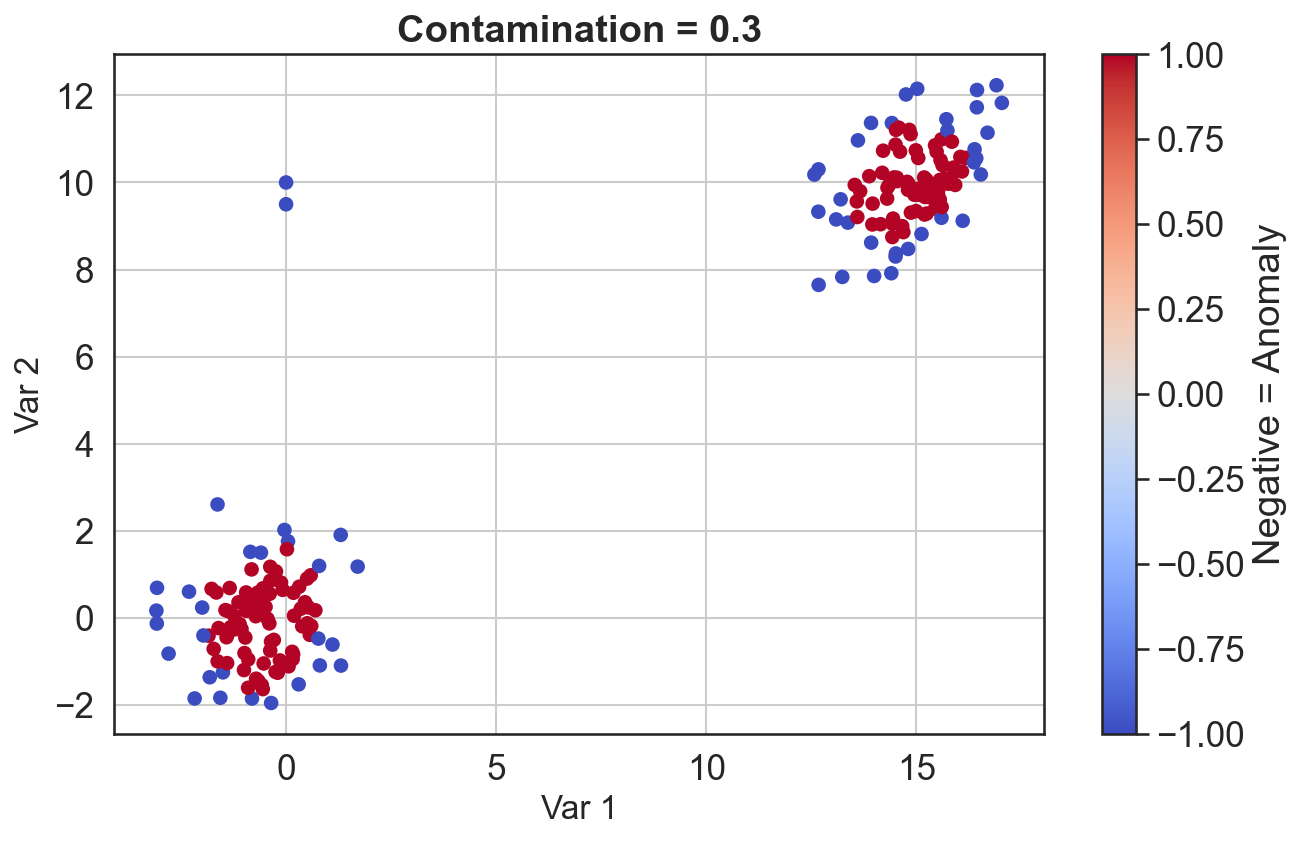

In [108]:
contaminations = [.01, .05, .2, .3]
for contamination in contaminations:
    model  =  ensemble.IsolationForest(n_estimators=50, max_samples=500, contamination=contamination, max_features=2, 
                             bootstrap=False, n_jobs=1, random_state=1, verbose=0, warm_start=False).fit(d)

    anomaly_score = model.decision_function(d)
    scores = model.score_samples(d)
    predictions = model.predict(d)

    plt.figure(figsize = (10, 6), dpi = 150)
    s = plt.scatter(d['Var 1'], d['Var 2'], c = predictions, cmap = 'coolwarm')
    plt.colorbar(s, label = 'Negative = Anomaly')
    plt.xlabel('Var 1', fontsize = 16)
    plt.ylabel('Var 2', fontsize = 16)
    plt.grid()
    plt.title(f'Contamination = {contamination}', weight = 'bold')
    save('IsolationForest_predictions_'+str(contamination))

### Visualizing the Isolation forest decision 

In [39]:
d3 = np.random.multivariate_normal(mean = np.array([-.5, 0]),
                               cov = np.array([[1, 0], [0, 1]]), size = 15)


d4 = np.random.multivariate_normal(mean = np.array([15, 10]),
                               cov = np.array([[1, 0.3], [.3, 1]]), size = 15)

outliers = np.array([[0, 10],[0, 9.5]])
d5 = pd.DataFrame(np.concatenate([d3, d4, outliers], axis = 0), columns = ['Var 1', 'Var 2'])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Var 1', ylabel='Var 2'>

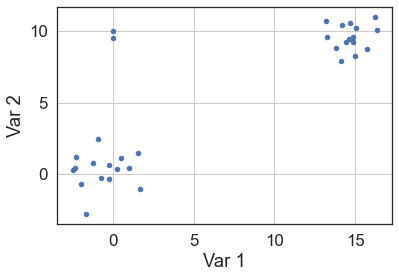

In [40]:
d5.plot.scatter('Var 1', 'Var 2', grid = True)


In [41]:
model  =  ensemble.IsolationForest(n_estimators=50, max_samples=500, contamination=.00001, max_features=2, 
                         bootstrap=False, n_jobs=1, random_state=1, verbose=0, warm_start=False).fit(d5)

anomaly_score = model.decision_function(d5)
scores = model.score_samples(d5)
predictions = model.predict(d5)

C:\Users\KNITISH\Miniconda3\lib\site-packages\sklearn\ensemble\_iforest.py:263: UserWarning: max_samples (500) is greater than the total number of samples (32). max_samples will be set to n_samples for estimation.
  warn("max_samples (%s) is greater than the "


In [42]:
ts = []
for t in model:
    ts.append(t)

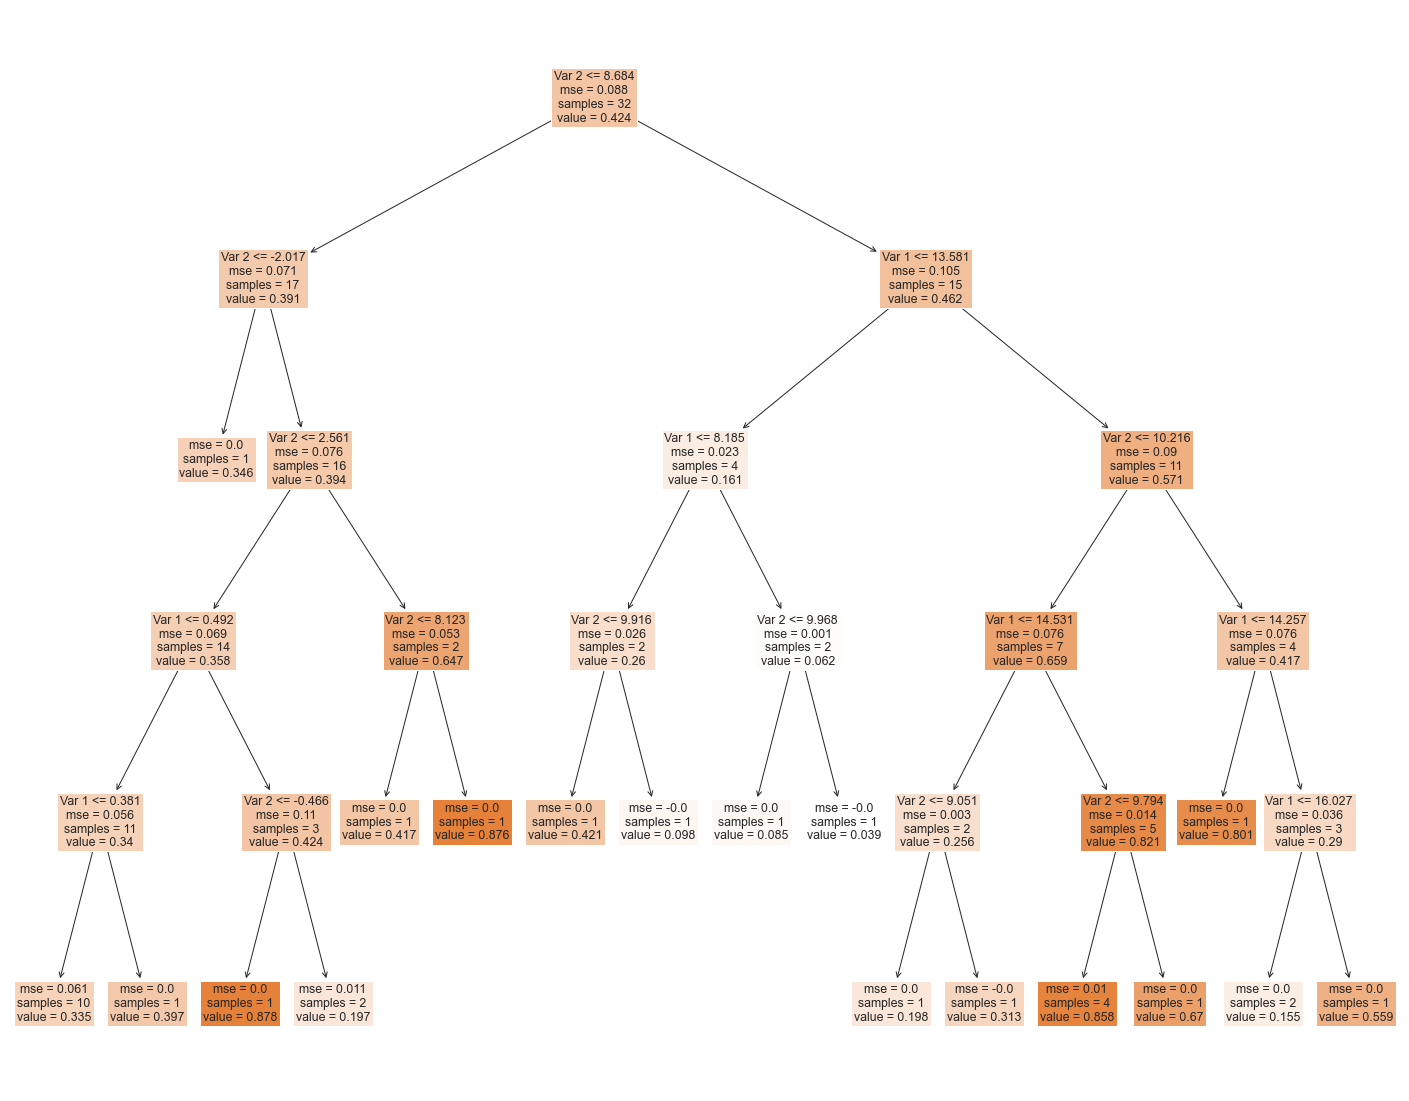

In [43]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(ts[2], 
                   feature_names=d.columns,  
                   filled=True)

In [45]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(t, out_file=None,  
                                feature_names=d.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

## OC-SVM

In [7]:
def scatter(data):
    column1 = data.columns[0]
    column2 = data.columns[1]
    
    data.plot.scatter(column1, column2, fontsize = 14, figsize = (10, 7), sharex = False)
    plt.grid(linestyle = '--')
    
    plt.xlabel(column1, fontsize = 14, weight = 'bold')
    plt.ylabel(column2, fontsize = 14, weight = 'bold')
    return plt


def plot_anomaly(data, predicted, cmap = 'Set1'):
    data2 = data.copy()
    data2['Predicted'] = predicted
    
    '''normal = data2.loc[data2['Predicted'] == 1, :]
    anomalies = data2.loc[data2['Predicted'] == -1, :]'''
    
    # Make Scatterplot
    column1 = data.columns[0]
    column2 = data.columns[1]
    
    
    ax = data2.plot.scatter(column1, column2, c = 'Predicted',cmap = cmap, fontsize = 14, figsize = (10, 7), sharex = False)
    

    plt.grid(linestyle = '--')
    
    plt.xlabel(column1, fontsize = 14, weight = 'bold')
    plt.ylabel(column2, fontsize = 14, weight = 'bold')
    return ax

def plot_anomaly2(data, predicted, ax):
    data2 = data.copy()
    data2['Predicted'] = predicted
    
    normal = data2.loc[data2['Predicted'] == 1, :]
    anomalies = data2.loc[data2['Predicted'] == -1, :]
    
    # Make Scatterplot
    column1 = data.columns[0]
    column2 = data.columns[1]
    
    
    anomalies.plot.scatter(column1, column2, color = 'tomato', fontsize = 14,  sharex = False, ax=ax)
    normal.plot.scatter(column1, column2, color = 'steelblue', fontsize = 14,  sharex = False, ax = ax)

    #plt.grid(linestyle = '--')
    
    plt.xlabel(column1, fontsize = 14, weight = 'bold')
    plt.ylabel(column2, fontsize = 14, weight = 'bold')
    return ax

In [12]:
d1 = np.random.multivariate_normal(mean = np.array([-.5, 0]),
                               cov = np.array([[1, 0], [0, 1]]), size = 100)


d2 = np.random.multivariate_normal(mean = np.array([15, 10]),
                               cov = np.array([[1, 0.3], [.3, 1]]), size = 100)

outliers = np.array([[0, 10],[0, 9.5]])
d = pd.DataFrame(np.concatenate([d1, d2, outliers], axis = 0), columns = ['Var 1', 'Var 2'])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Adding Outliers


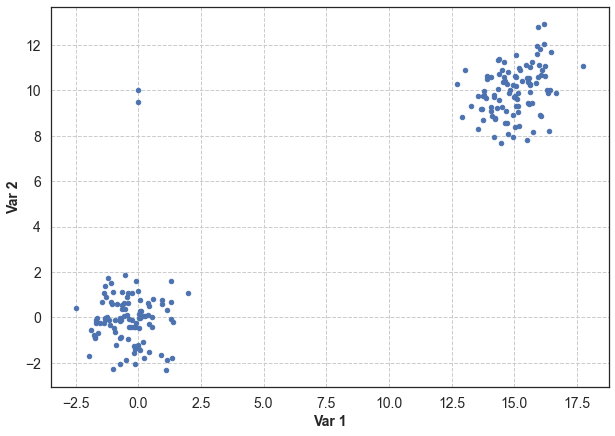

In [13]:
'''center1 = np.array([10, 10])
center2 = np.array([100, 100])
n_samples = 150

cluster1 = pd.DataFrame(center1 + np.random.normal(0, 6, (n_samples, 2)))
cluster2 = pd.DataFrame(center2 + np.random.normal(0, 6, (n_samples, 2)))

clean_data = pd.concat([cluster1, cluster2], axis = 0)
clean_data.columns = ['Col 1', 'Col 2']

# Visualize Clean Data
scatter(clean_data)
plt.show()
'''
print('Adding Outliers')

outliers = pd.DataFrame([[60,60], [65, 70]], columns = ['Col 1', 'Col 2'])
#all_data = pd.concat([clean_data, outliers], axis = 0)
all_data = d.copy()

scatter(all_data)
plt.show()

In [8]:
x_fake  =  pd.DataFrame(np.random.uniform(-5, 19, (35000, 2)), columns = ['Var 1', 'Var 2'])

In [10]:
plt.style.use('seaborn-white')

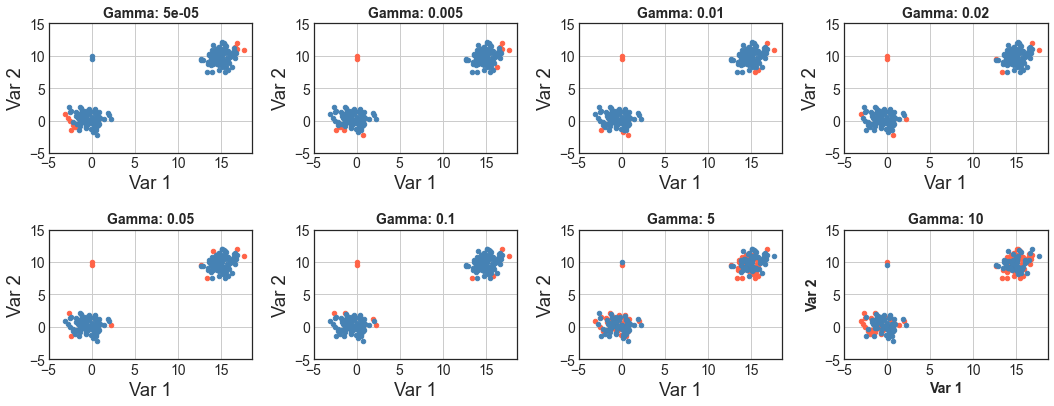

In [15]:
gammas = [.00005, .005, .01, .02,  .05, .1, 5, 10]
fig, axes = plt.subplots(2, 4, figsize = (15, 6), tight_layout = True)
for i, ax in zip(range(len(gammas)), axes.flatten()):
    gamma = gammas[i]
    model = svm.OneClassSVM(kernel='rbf', degree=5, gamma=gamma, coef0=0.0, tol=0.001, nu=0.05, 
                        shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(all_data)

    
    
    model_predictions = model.predict(all_data)
    #x_fake['Predictions'] = model_predictions

    ax = plot_anomaly2(all_data, model_predictions,ax)
    ax.set_xticks(np.arange(-5, 19, 5))
    ax.set_yticks(np.arange(-5, 16, 5))
    #ax.scatter(all_data.iloc[:, 0], all_data.iloc[:, 1], color = 'k', s = 10)
    ax.set_title('Gamma: {}'.format(np.around(gamma,6)), weight = 'bold', fontsize = 14)
    ax.grid()
save('SVM_Gamma')
#plt.savefig('D:\\DS and ML\\anomaly\\'+str(i)+'.png', bbox_inches = 'tight')

In [15]:
def plot_anomaly3(data, predicted, ax):
    data2 = data.copy()
    data2['Predicted'] = predicted
    
    normal = data2.loc[data2['Predicted'] == 1, :]
    anomalies = data2.loc[data2['Predicted'] == -1, :]
    
    # Make Scatterplot
    column1 = data.columns[0]
    column2 = data.columns[1]
    
    
    anomalies.plot.scatter(column1, column2, color = 'tomato', fontsize = 14,  sharex = False, ax=ax)
    cb = normal.plot.scatter(column1, column2, color = 'steelblue', fontsize = 14,  sharex = False, ax = ax)
    #plt.gcf().colorbar(cb, ax = ax)
    #plt.grid(linestyle = '--')
    
    plt.xlabel(column1, fontsize = 14, weight = 'bold')
    plt.ylabel(column2, fontsize = 14, weight = 'bold')
    plt.grid()
    return ax

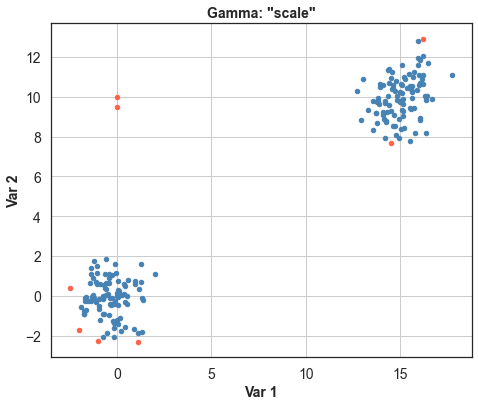

In [16]:
fig, ax = plt.subplots(figsize = (7, 6), tight_layout = True)

model = svm.OneClassSVM(kernel='rbf', degree=5, gamma='scale', coef0=0.0, tol=0.001, nu=0.05, 
                    shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(all_data)



model_predictions = model.predict(all_data)
#x_fake['Predictions'] = model_predictions

ax = plot_anomaly3(all_data, model_predictions,ax)

#ax.scatter(all_data.iloc[:, 0], all_data.iloc[:, 1], color = 'k', s = 10)
ax.set_title('Gamma: {}'.format('"scale"'), weight = 'bold', fontsize = 14)
save('gamma_scale')

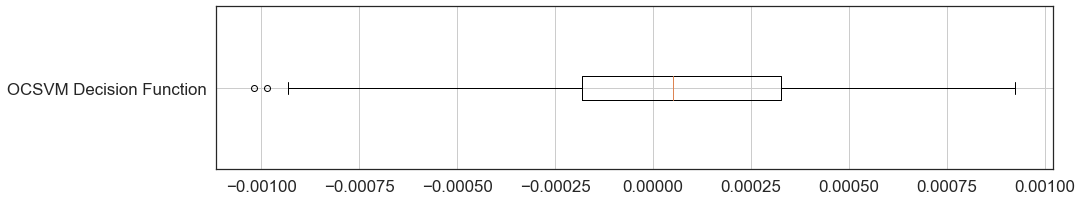

In [25]:
dec_op = model.decision_function(all_data)
plt.figure(figsize = (15, 3))
plt.boxplot(dec_op, vert = False)
plt.grid()
plt.yticks([1], ['OCSVM Decision Function'])
save('OCSVM_Boxplot')

In [17]:
gammas = [.00005, .005, .01, .05, .1,.3, .6, .9, 2,]
gammas = np.logspace(-5, 1, 20)
nos = []
for gamma in gammas:
    model = svm.OneClassSVM(kernel='rbf', degree=5, gamma=gamma, coef0=0.0, tol=0.001, nu=0.01, 
                        shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(all_data)
    
    # Calculate the number of Inliers
    preds = x_fake.copy()
    preds['Prediction'] = model.predict(x_fake)
    preds.loc[preds['Prediction'] == -1, 'Prediction'] = 0
    
    no = preds.loc[:, 'Prediction'].sum()
    nos.append(no)
    print('Gamma: {} Done'.format(gamma))
    
    

NameError: name 'x_fake' is not defined

"\ndf = pd.DataFrame()\ndf['gammas'] = gammas\ndf['nos'] = nos\n\nmax_arg = df.diff()['nos'].argmin()\n\nplt.plot(df.loc[max_arg, 'gammas'], df.loc[max_arg, 'nos'], marker = 'v')\nplt.title('Best Gamma: {}'.format(df.loc[max_arg, 'gammas']))"

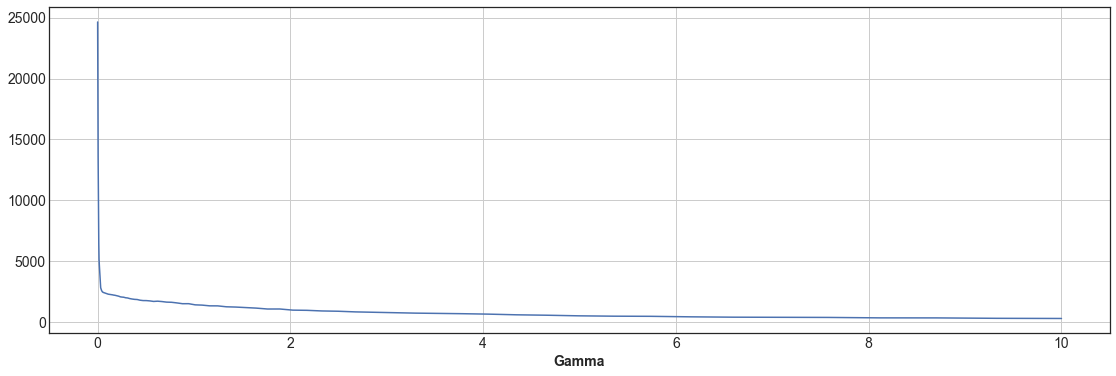

In [23]:
plt.figure(figsize = (19, 6))
plt.plot(gammas, nos)
plt.xlabel('Gamma', fontsize=14, weight='bold')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
'''
df = pd.DataFrame()
df['gammas'] = gammas
df['nos'] = nos

max_arg = df.diff()['nos'].argmin()

plt.plot(df.loc[max_arg, 'gammas'], df.loc[max_arg, 'nos'], marker = 'v')
plt.title('Best Gamma: {}'.format(df.loc[max_arg, 'gammas']))'''

In [24]:

d11 = pd.DataFrame({
    'g1': ['a', 'a', 'b','b'],
    'g2': ['c', 'c', 'd','d'],
    'g3': ['e', 'e', 'f','f'],
    'first column': [1, 2, 3, 4],
    'second column': [10, 20, 30, 40]
})

d11.to_csv('C:\\Users\\KNITISH\\Documents\\Streamlit\\test.csv', index = None)

In [25]:
pd.pivot_table?